# Data Visualisation using Seaborn

Based on Daniel Y. Chen's course 'Pandas Data Analysis with Python Fundamentals' (https://learning.oreilly.com/videos/pandas-data-analysis/9780134692272/9780134692272-PAND_04_03) we will recreate the plots shown in this course using seaborn. The tips data set was copied from https://www.kaggle.com/ranjeetjain3/seaborn-tips-dataset and the anscombe data set was downloaded from https://gist.github.com/ericbusboom/b2ac1d366c005cd2ed8c.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


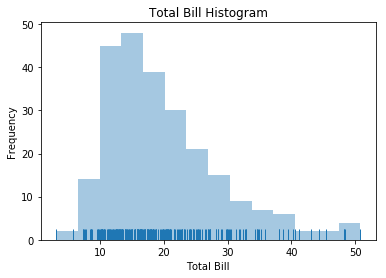

In [16]:
hist = sns.distplot(tips['total_bill'], rug=True, kde=False)
hist.set_title('Total Bill Histogram')
hist.set_xlabel('Total Bill')
hist.set_ylabel('Frequency') #with hist=False the y-axis shows the unit probability
plt.show() #not necessary in jupyter notebook; will be left out hereafter

Text(0, 0.5, 'Frequency')

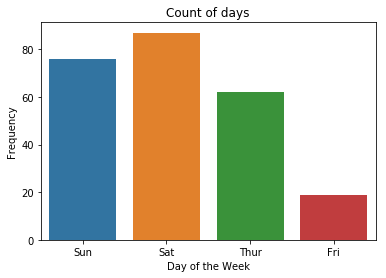

In [17]:
count = sns.countplot('day', data=tips) #this kind of plot is used for discrete variables
count.set_title('Count of days')
count.set_xlabel('Day of the Week')
count.set_ylabel('Frequency')

# Scatterplots

Scatterplots are a great way to plot two continuous variables.

Text(0, 0.5, 'Tip')

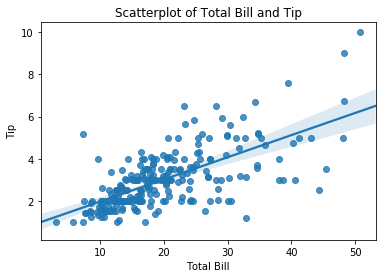

In [12]:
scatter = sns.regplot(x='total_bill', y='tip', data=tips)
scatter.set_title('Scatterplot of Total Bill and Tip')
scatter.set_xlabel('Total Bill')
scatter.set_ylabel('Tip')

There's a different way to create scatterplots:

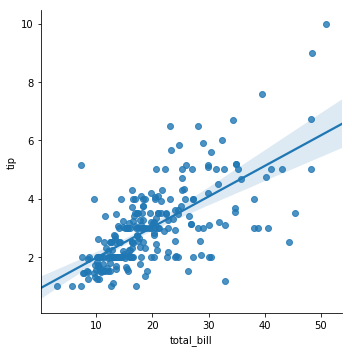

In [35]:
fig = sns.lmplot(x='total_bill', y='tip', data=tips) #lmplot calls regplot under the hood

Let's now set the hue parameter to gender.

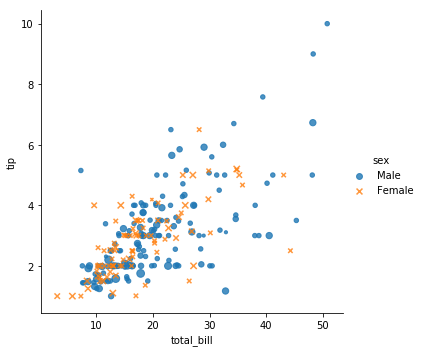

In [41]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o', 'x'], scatter_kws = {'s': tips['size']*10}, fit_reg=False)
#kws stands for keyword argument

Text(0.5, 0.98, 'Joint plot of Total Bill and Tip')

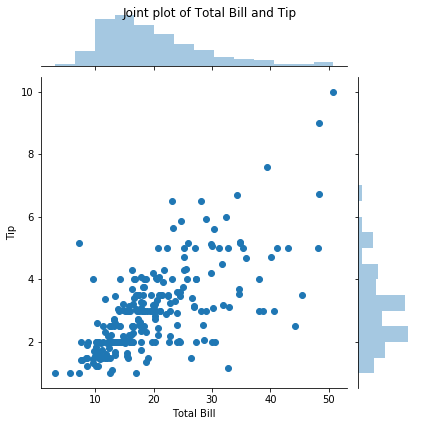

In [13]:
scatter = sns.jointplot(x='total_bill', y='tip', data=tips)
scatter.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
scatter.fig.suptitle('Joint plot of Total Bill and Tip')

Text(0.5, 0.98, 'Hexbin Joint Plot of Total Bill and Tip')

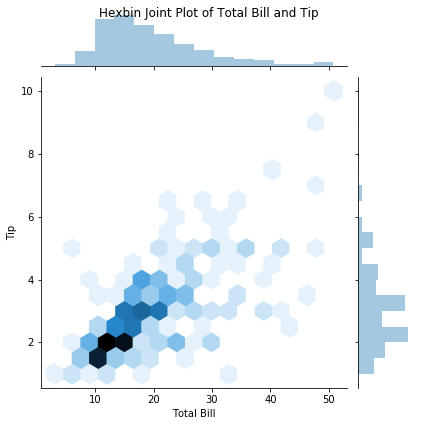

In [18]:
#hexplots give a quick representation of where most data points are
hbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip')

Text(0, 0.5, 'Tip')

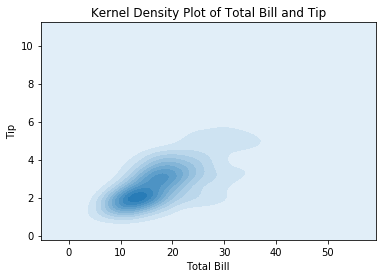

In [20]:
#two-dimensional kernel density estimation plot:
kde = sns.kdeplot(data=tips['total_bill'], data2=tips['tip'], shade=True)
kde.set_title('Kernel Density Plot of Total Bill and Tip')
kde.set_xlabel('Total Bill')
kde.set_ylabel('Tip')

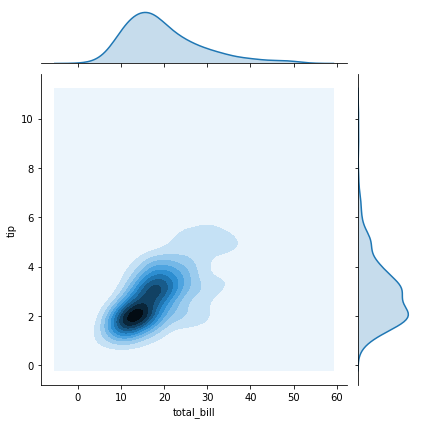

In [22]:
kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

# Barplots

Text(0, 0.5, 'Average total bill')

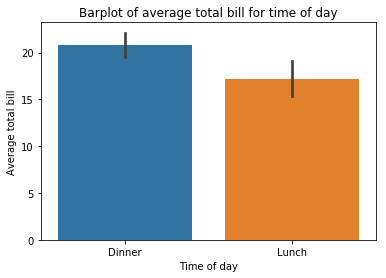

In [25]:
bar = sns.barplot(x='time', y='total_bill', data=tips)
bar.set_title('Barplot of average total bill for time of day')
bar.set_xlabel('Time of day')
bar.set_ylabel('Average total bill')

# Boxplot

Text(0, 0.5, 'Total Bill')

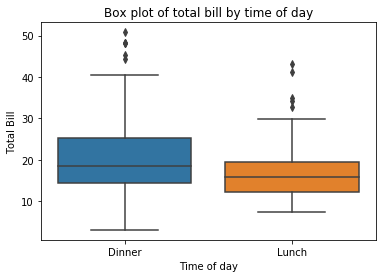

In [26]:
box = sns.boxplot(x='time', y='total_bill', data=tips)
box.set_title('Box plot of total bill by time of day')
box.set_xlabel('Time of day')
box.set_ylabel('Total Bill')

# Violin plot

Text(0, 0.5, 'Total Bill')

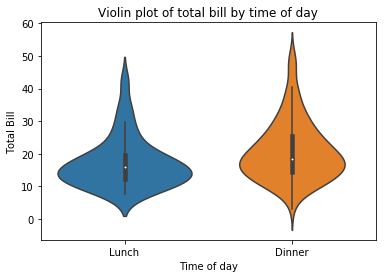

In [33]:
violin = sns.violinplot(x='time', y='total_bill', data=tips)
violin.set_title('Violin plot of total bill by time of day')
violin.set_xlabel('Time of day')
violin.set_ylabel('Total Bill')

Let's colour each violin differently based on sex.

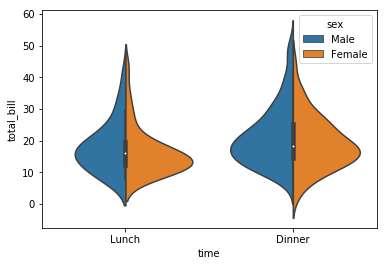

In [34]:
violin = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex', split=True)

# Pair Grid Plot

To identify relationship for mostly numeric data, the pair grid plot is used. 
Let's subset the tips data to only work with numeric data.

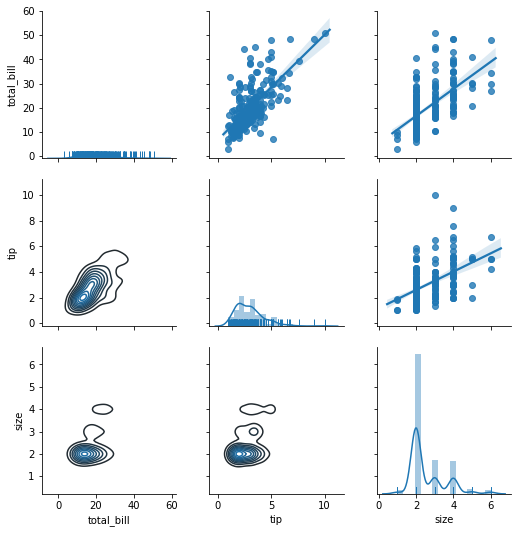

In [31]:
tips = tips[['total_bill', 'tip', 'size']]
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

Let's reload back the original tips dataset.

In [32]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Pair Plot

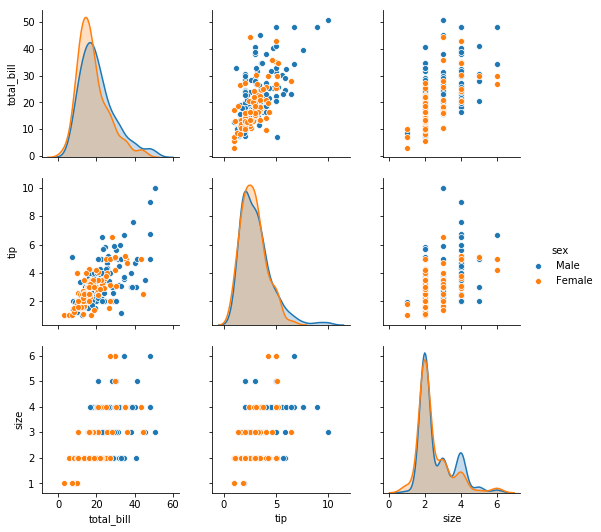

In [37]:
pair_plot = sns.pairplot(tips, hue='sex')

# Facets

Facets allow you to create one single plot and then create the same plot over and over again depending on the different columns.

Let's first import the anscombe data set.

In [42]:
anscombe = pd.read_csv('anscombes.csv')
anscombe.head()

,id,dataset,x,y
0,0,I,10.0,8.04
1,1,I,8.0,6.95
2,2,I,13.0,7.58
3,3,I,9.0,8.81
4,4,I,11.0,8.33


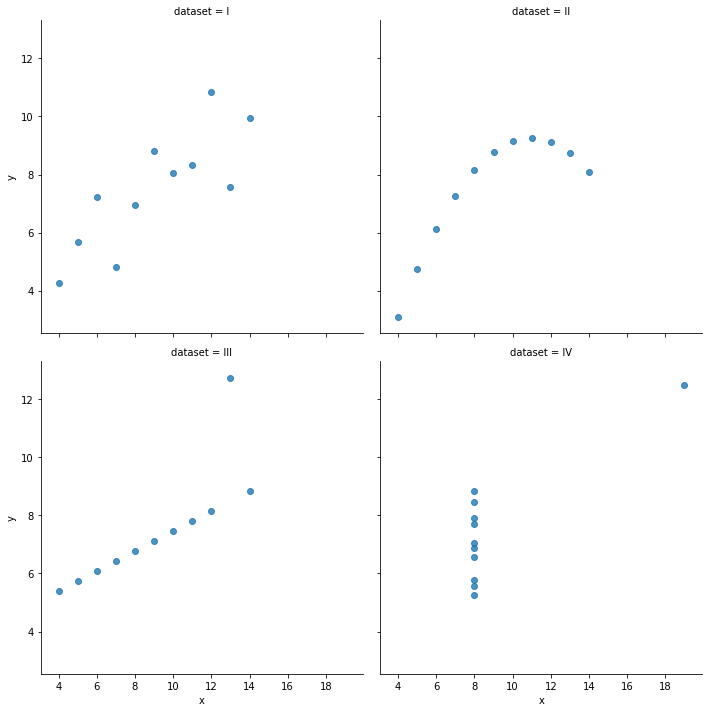

In [43]:
anscombe = sns.lmplot(x='x', y='y', data=anscombe, fit_reg=False, col='dataset', col_wrap=2)
#the subplots are based on the col parameter

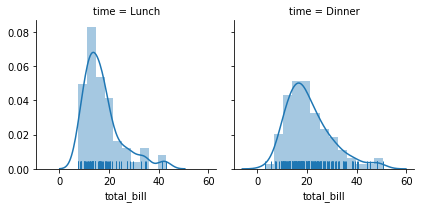

In [44]:
facet = sns.FacetGrid(tips, col='time')
facet.map(sns.distplot, 'total_bill', rug=True)

Facets with bivariate data:

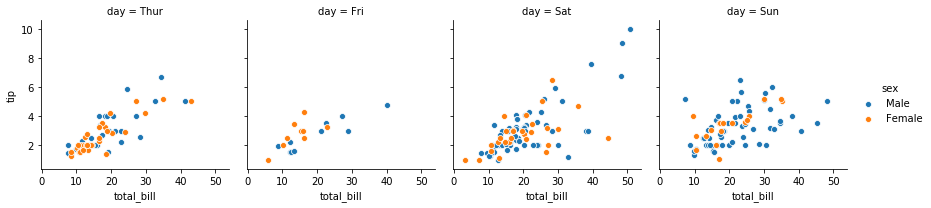

In [47]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet.map(sns.scatterplot, 'total_bill', 'tip')
facet = facet.add_legend()

Create a facet plot using a plotting function that takes the col parameter:

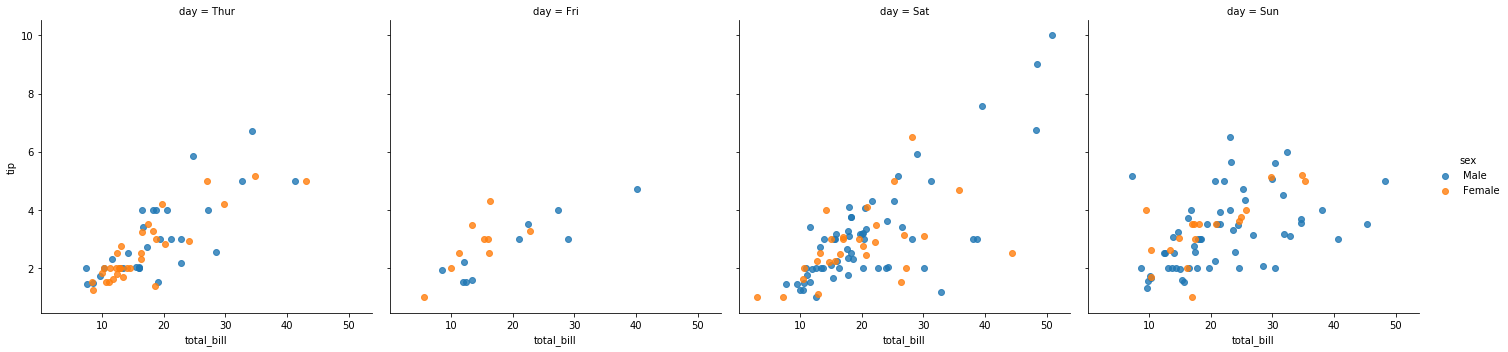

In [51]:
facet = sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False, hue='sex', col='day')

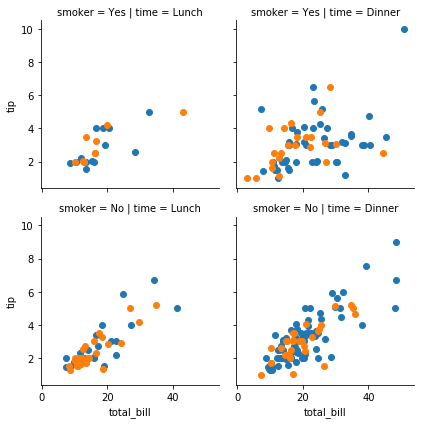

In [57]:
#using facet grid one can split by two more parameters using col and row
facet = sns.FacetGrid(tips, col='time', row='smoker', hue='sex')
facet.map(plt.scatter, 'total_bill', 'tip')

# Catplots

Working with discrete variables:

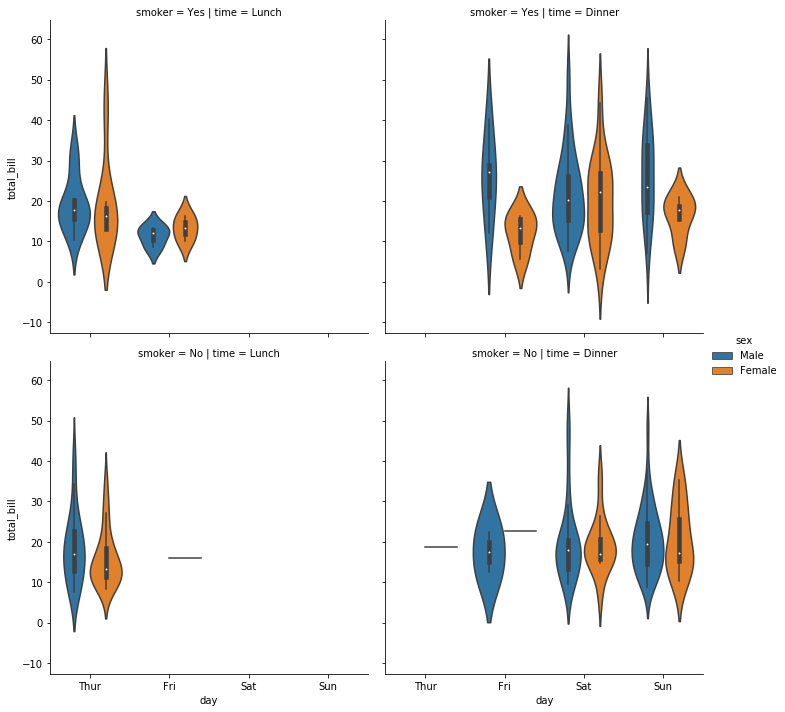

In [56]:
factor_plot = sns.catplot(x='day', y='total_bill', data=tips, hue='sex',col='time', row='smoker', kind='violin')